# Capstone Project on Predicting Credit Card Approvals

## Introduction

Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

### Attribute Descriptions


Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected. 

In [1]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading the data set
df=pd.read_csv("Credit_card.csv")
df1=pd.read_csv("Credit_card_label.csv")
#merging the data set
df2=pd.merge(df,df1,on="Ind_ID")

In [3]:
df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [4]:
# renaming the column names 
df2 = df2.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})

In [5]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
df2.describe()  #Finding the mean, min, max, and std deviation

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
# find out the null values
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [8]:
df2.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<AxesSubplot:>

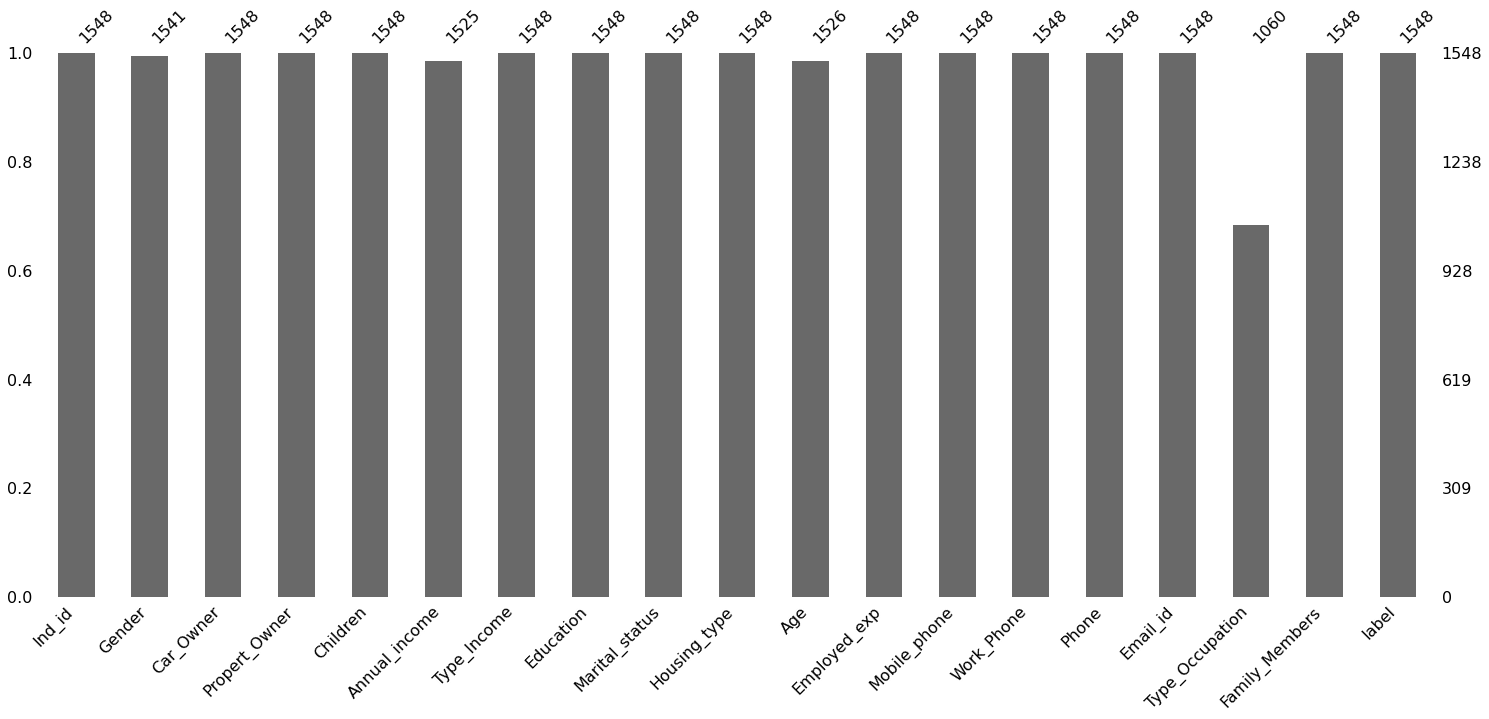

In [9]:
# exploratory the missing values
import missingno as msno
msno.bar(df2) 

<AxesSubplot:>

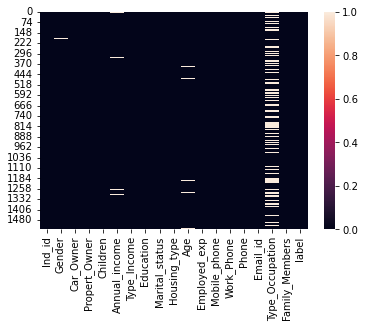

In [10]:
# visualising the missing values
sns.heatmap(df2.isnull())  

In [11]:
# Imputing the null values with mean values
df2.fillna(df2.mean(), inplace=True) 

In [12]:
# finding the null values.
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [13]:
# replace missing values
df2['Type_Occupation'].fillna('other',inplace=True)

In [14]:
# Deleting the null values in the Gender column
df2=df2.dropna(subset=["Gender"])

In [15]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1


In [16]:
df2.shape

(1541, 19)

In [17]:
df2.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employed_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1541 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   Children         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   Education        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Age              1541 non-null   float64
 11  Employed_exp     1541 non-null   int64  
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  Email_id         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   object 
 17  Family_Members